In [1]:

import numpy as np
import matplotlib.pyplot as plt
 
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.5.0


In [3]:
number_mnist = keras.datasets.mnist
print(number_mnist)

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>


In [4]:
(train_images, train_labels), (test_images, test_labels) = number_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# train_images.size    #total no. of pixels

train_images[1].shape
type(train_images)

numpy.ndarray

In [9]:
print(train_labels)
# print(train_labels.size)
print(test_labels)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


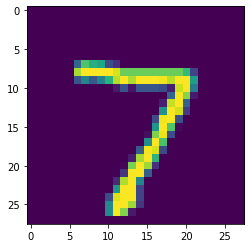

In [12]:
plt.imshow(test_images[0])
#plt.grid(True)
plt.show()

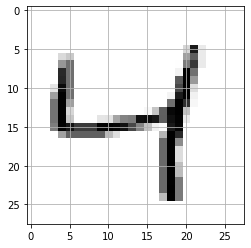

In [13]:
plt.imshow(train_images[2], cmap='Greys')
plt.grid(True)
plt.show()

In [14]:
print(train_images[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

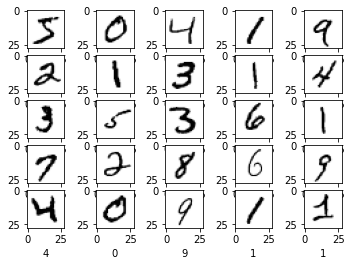

In [15]:
plt.figure()
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.imshow(train_images[i], cmap="Greys")
  plt.xlabel(train_labels[i])
plt.show()

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
print(train_images[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [18]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9265
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1133 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0781 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0572 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0352 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0225 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0200 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.014

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9758
Test accuracy 0.9757999777793884


In [22]:
predictions = model.predict(test_images)

In [26]:
predictions[1]

array([2.61366744e-11, 9.94890073e-08, 9.99999881e-01, 1.01783995e-08,
       2.51069036e-17, 1.35064269e-12, 7.22597112e-12, 4.02628977e-22,
       4.44339787e-10, 4.06501906e-18], dtype=float32)

In [27]:
np.argmax(predictions[1])

2

In [28]:
test_labels[1]

2